<a href="https://colab.research.google.com/github/anarossati/Decision_Tree/blob/main/Decision_Tree_ironhac_04_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 - Introdução to Decision Trees

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

Data loading

In [12]:
weath=pd.read_csv('https://raw.githubusercontent.com/fredericods-zz/predict-rain/master/weatherAUS.csv')
weath.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Data Manipulation

In [13]:
wnoman=weath.dropna() # foi tirado tudo q tinha valores nulos, sem informação
wnoman.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
5944,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No


In [16]:
# Reduce the number of features: this is to make the illustration of the concepts easier
data_feat_select=wnoman[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'RainTomorrow']]

In [18]:
# check classes imbalance
data_feat_select.RainTomorrow.value_counts()

No     43993
Yes    12427
Name: RainTomorrow, dtype: int64

In [20]:
# The classes are highly imbalanced. Balance the dataset with equal number of yes and no. Unbalanced classes ("No '\
# rain, Yes rain") could impact the performance of algorithm

# sampling randomly 13000 data from the no label to make the dataset balanced
labels_no = data_feat_select[data_feat_select.RainTomorrow=='No']
labels_yes=data_feat_select[data_feat_select.RainTomorrow=='Yes']
resampledind=np.random.choice(labels_no.index,13000,replace=False)

# New dataset with balanced classes
data_feat_select_balanced=pd.concat([labels_yes,labels_no.loc[resampledind]], axis=0)

In [21]:
y=data_feat_select_balanced.RainTomorrow # Target or responde variable
x=data_feat_select_balanced.drop('RainTomorrow', axis=1)

In [22]:
x.head()

,MinTemp,MaxTemp,Rainfall,Evaporation
5957,21.4,37.5,0.0,14.8
5960,21.8,30.7,0.0,8.0
5961,20.3,36.0,18.0,8.2
5972,23.6,40.4,0.6,11.8
5982,16.8,23.3,0.6,8.0


In [24]:
y.value_counts()

No     13000
Yes    12427
Name: RainTomorrow, dtype: int64

Training and testing the Decision Tree algorithm

In [26]:
# Divide the data in train and test sets
# Use train test split function

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [27]:
# Introduce the dexision tree algorithm
# Decision tree algorithm with possibility to choose the depth of the tree

clf_test = DecisionTreeClassifier(max_depth=10)
clf_test.fit(X_train, Y_train) # train the algorithm on training data

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
clf = DecisionTreeClassifier(max_depth=3) # 3 decisions
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Plotting the tree

([Text(930.0, 1585.5, 'Rainfall <= 0.35\ngini = 0.5\nsamples = 20341\nvalue = [10441, 9900]\nclass = Yes'),
  Text(465.0, 1132.5, 'MaxTemp <= 23.85\ngini = 0.454\nsamples = 12490\nvalue = [8142, 4348]\nclass = Yes'),
  Text(232.5, 679.5, 'MinTemp <= 8.45\ngini = 0.485\nsamples = 5637\nvalue = [3307, 2330]\nclass = Yes'),
  Text(116.25, 226.5, 'gini = 0.439\nsamples = 2691\nvalue = [1814, 877]\nclass = Yes'),
  Text(348.75, 226.5, 'gini = 0.5\nsamples = 2946\nvalue = [1493, 1453]\nclass = Yes'),
  Text(697.5, 679.5, 'MinTemp <= 22.85\ngini = 0.416\nsamples = 6853\nvalue = [4835, 2018]\nclass = Yes'),
  Text(581.25, 226.5, 'gini = 0.375\nsamples = 5717\nvalue = [4286, 1431]\nclass = Yes'),
  Text(813.75, 226.5, 'gini = 0.499\nsamples = 1136\nvalue = [549, 587]\nclass = No'),
  Text(1395.0, 1132.5, 'Rainfall <= 3.3\ngini = 0.414\nsamples = 7851\nvalue = [2299, 5552]\nclass = No'),
  Text(1162.5, 679.5, 'MinTemp <= 6.65\ngini = 0.475\nsamples = 3698\nvalue = [1437, 2261]\nclass = No'),
  T

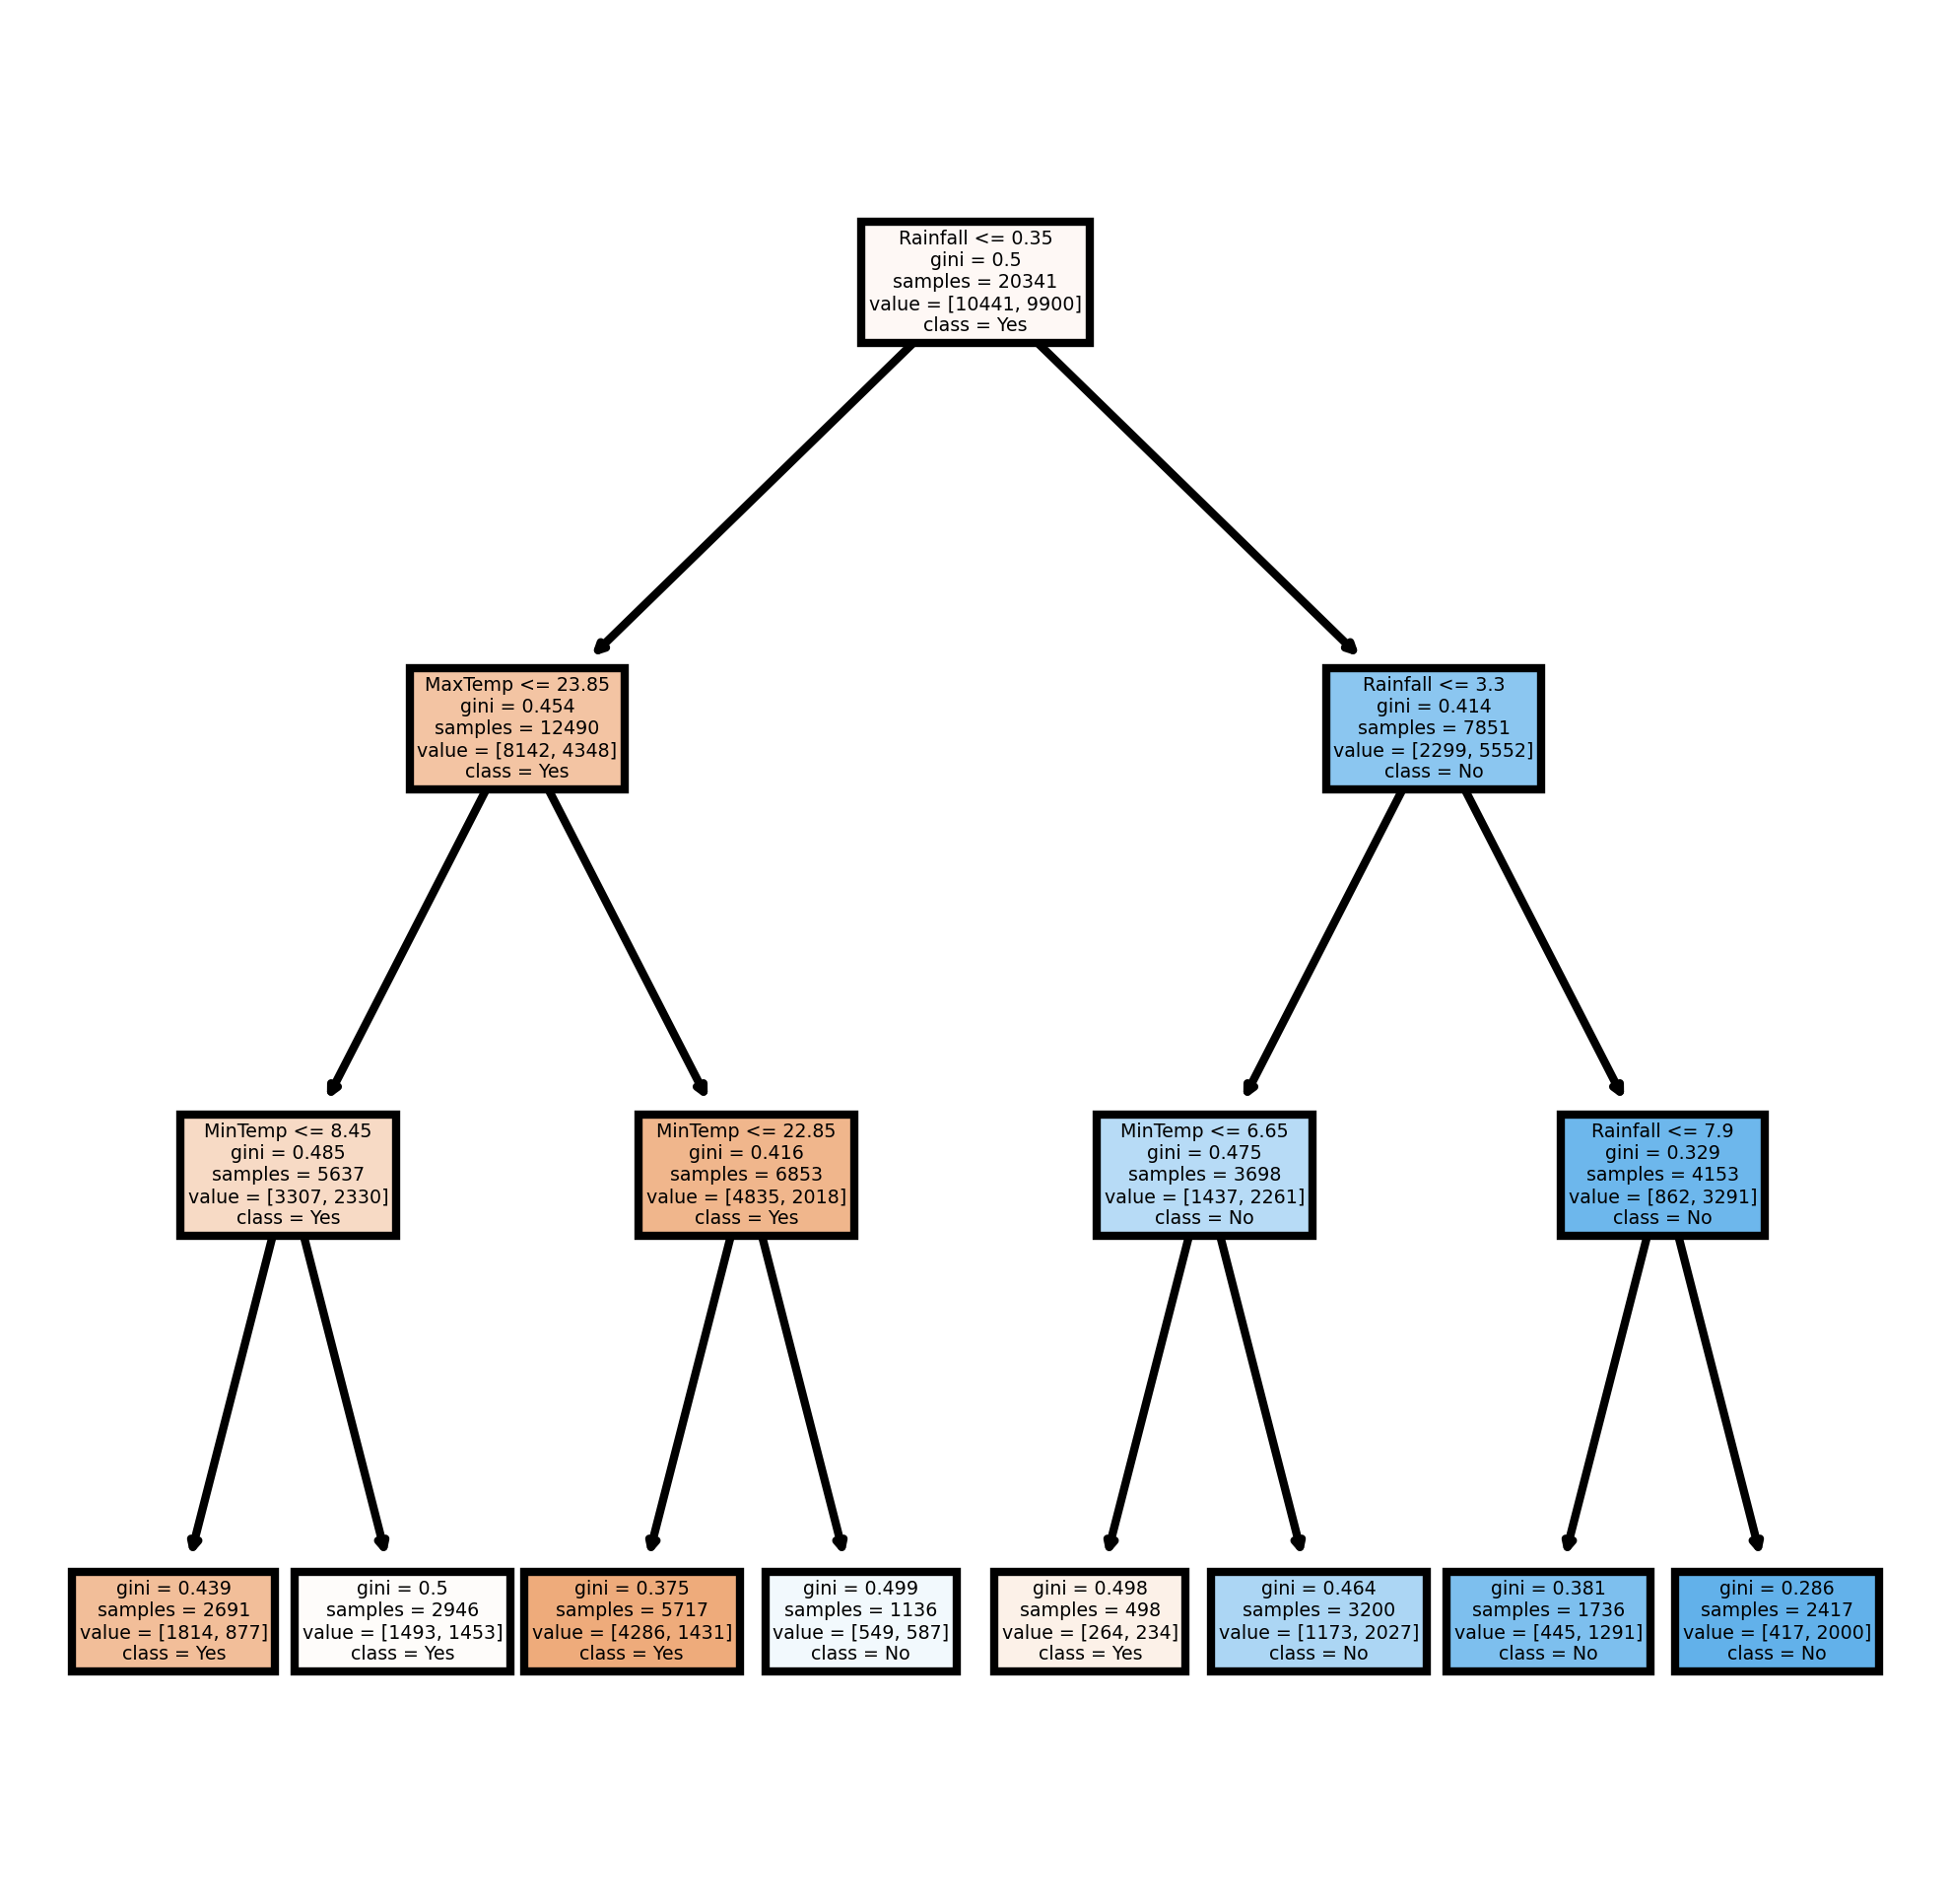

In [29]:
# Model with 3 decisions

fn=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation']
cn=['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=600)
tree.plot_tree(clf,
               feature_names = fn,
               class_names=cn,
               filled = True),

Visualize performance on training data

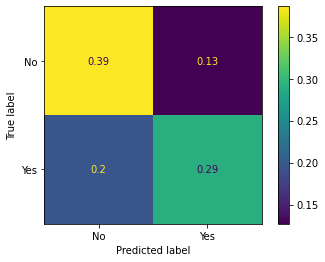

In [30]:
plot_confusion_matrix(clf, X_train, Y_train, normalize='all')
plt.show()

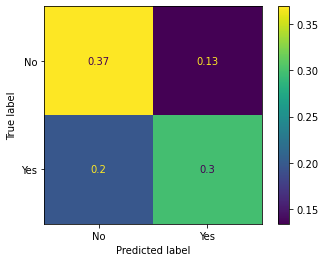

In [31]:
plot_confusion_matrix(clf, X_test, Y_test, normalize='all')
plt.show()

In [33]:
target_names = ['Yes', 'No']
ypred_test=clf.predict(X_test)
print(classification_report(Y_test, ypred_test, target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.65      0.73      0.69      2559
          No       0.69      0.60      0.64      2527

    accuracy                           0.67      5086
   macro avg       0.67      0.67      0.67      5086
weighted avg       0.67      0.67      0.67      5086



Conclusions

In this notebook we give an example of how a decision tree can be used to predict the weather based on a number of features in the a dataset that collects informations about the Weather in Australia


*   We show how a simple tree can be visualized along with its performance on the training and test set
*   We mention how a tree that fits the training data very well can lead to worse performance on the test set
*   Challenge: Try to use a random florest algorithm to improve on the performance of a single tree



